In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# загрузим данные
df = pd.read_csv(r'C:\Users\khakh\Downloads\archive (1)\insurance.csv')

In [7]:
# посмотрим из чего состоит таблица
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# видим признаки age, sex, bmi, children, smoker, region и целевую переменную charges.
# Посмотрим на статистику по этим переменным.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# найдем разницу между первым и вторым квартилем
print(9382-4740)
# между вторым и третьим
print(16639-9382)

4642
7257


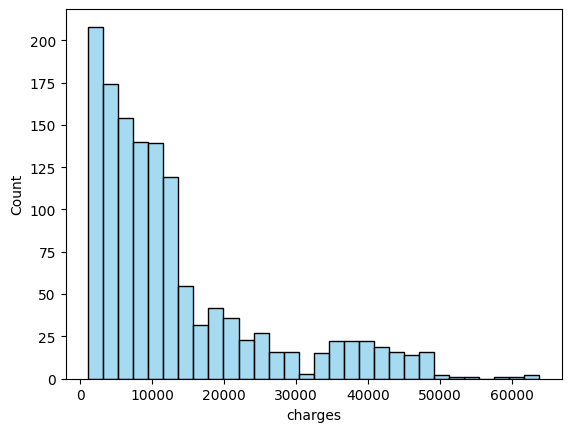

In [44]:
# похоже, что распределение charges сильно смещено. Построим гистрограмму.
sns.histplot(df['charges'], bins=30, color='skyblue', edgecolor='black');

In [45]:
# имеет смысл прологарифмировать
df['log_charges'] = np.log(df['charges'])

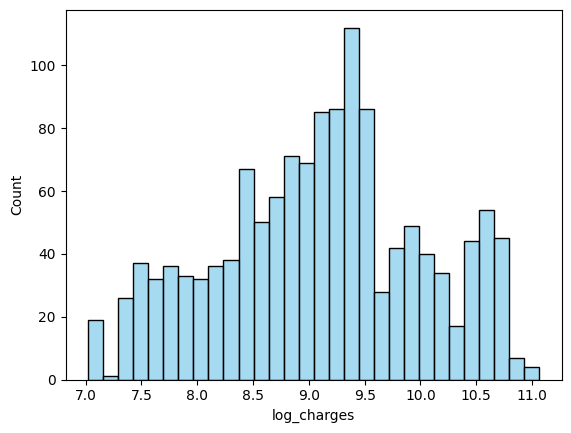

In [47]:
# посмотрим теперь на распределение
sns.histplot(df['log_charges'], bins=30, color='skyblue', edgecolor='black');

In [62]:
df.isnan()

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [61]:
# видим приблизительно три моды. Подумаем об этом позже, а пока сделаем безлайн модель.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['sex'] = df['sex'].map({0: 'male', 1: 'female'})
df['smoker'] = df['smoker'].map({0: 'no', 1: 'yes'})

# надо выделить X, y
y = df['charges']
X = df.drop(columns=['charges', 'region'])

# надо разделить данные на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y)

# создаем модель
lr = LinearRegression()

lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values